# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
from api_keys import api_key
from datetime import datetime
import openweathermapy as owm

url = "http://api.openweathermap.org/data/2.5/"

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

settings = {"units": "imperial", "appid": api_key}

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
settings = {"units": "imperial", "appid": api_key}

WeatherPy_df =pd.DataFrame(
    columns = [
        "City","Cloudiness", "Country", "Date", "Max Temp", "Wind Speed", "Lat","Lng", "Humidity"
    ]
)

count = 1
err = 0 
sets = 0
index = 0 

t0 = time.time()

print(f'Beginning Data Retrieval \n ........................')

for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{url}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        city_stats
        WeatherPy_df.loc[index, "City"] = city_stats["name"]
        WeatherPy_df.loc[index,"Cloudiness"] = city_stats("clouds.all")
        WeatherPy_df.loc[index,"Country"] = city_stats("sys.country")
        WeatherPy_df.loc[index,"Date"] = city_stats("dt")
        WeatherPy_df.loc[index,"Max Temp"] = city_stats("main.temp_max")
        WeatherPy_df.loc[index,"Wind Speed"] = city_stats("wind.speed")
        WeatherPy_df.loc[index,"Lat"] = city_stats("coord.lat")
        WeatherPy_df.loc[index,"Lng"] = city_stats("coord.lon")
        WeatherPy_df.loc[index,"Humidity"] = city_stats("main.humidity")
        index = index + 1 
        
    except Exception as e:
        print(e)
        err= err + 1
        
    count = count + 1

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | albany
http://api.openweathermap.org/data/2.5/weather?q=albany&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 2 of Set 0 | vaini
http://api.openweathermap.org/data/2.5/weather?q=vaini&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 3 of Set 0 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?q=ribeira%20grande&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 4 of Set 0 | avarua
http://api.openweathermap.org/data/2.5/weather?q=avarua&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 5 of Set 0 | kapaa
http://api.openweathermap.org/data/2.5/weather?q=kapaa&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 6 of Set 0 | mataura
http://api.openweathermap.org/data/2.5/weather?q=mataura&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 7 of Set 0 | pevek
http://

Processing Record 54 of Set 0 | katsuura
http://api.openweathermap.org/data/2.5/weather?q=katsuura&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 55 of Set 0 | cidreira
http://api.openweathermap.org/data/2.5/weather?q=cidreira&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 56 of Set 0 | dhidhdhoo
http://api.openweathermap.org/data/2.5/weather?q=dhidhdhoo&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 57 of Set 0 | syava
http://api.openweathermap.org/data/2.5/weather?q=syava&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 58 of Set 0 | zhigansk
http://api.openweathermap.org/data/2.5/weather?q=zhigansk&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 59 of Set 0 | saint anthony
http://api.openweathermap.org/data/2.5/weather?q=saint%20anthony&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 60 of Set 0 | saint-philippe
http://api.openweathermap.o

Processing Record 106 of Set 0 | san miguel
http://api.openweathermap.org/data/2.5/weather?q=san%20miguel&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 107 of Set 0 | luderitz
http://api.openweathermap.org/data/2.5/weather?q=luderitz&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 108 of Set 0 | yellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 109 of Set 0 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?q=guerrero%20negro&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 110 of Set 0 | godec
http://api.openweathermap.org/data/2.5/weather?q=godec&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
HTTP Error 404: Not Found
Processing Record 111 of Set 0 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?q=longyearbyen&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 112 

Processing Record 159 of Set 0 | belushya guba
http://api.openweathermap.org/data/2.5/weather?q=belushya%20guba&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
HTTP Error 404: Not Found
Processing Record 160 of Set 0 | khoy
http://api.openweathermap.org/data/2.5/weather?q=khoy&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 161 of Set 0 | kota kinabalu
http://api.openweathermap.org/data/2.5/weather?q=kota%20kinabalu&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 162 of Set 0 | poddorye
http://api.openweathermap.org/data/2.5/weather?q=poddorye&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 163 of Set 0 | alofi
http://api.openweathermap.org/data/2.5/weather?q=alofi&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 164 of Set 0 | tiarei
http://api.openweathermap.org/data/2.5/weather?q=tiarei&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 165 of Set 0 | balaguer
ht

Processing Record 211 of Set 0 | maine-soroa
http://api.openweathermap.org/data/2.5/weather?q=maine-soroa&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 212 of Set 0 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?q=los%20llanos%20de%20aridane&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 213 of Set 0 | flinders
http://api.openweathermap.org/data/2.5/weather?q=flinders&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 214 of Set 0 | makakilo city
http://api.openweathermap.org/data/2.5/weather?q=makakilo%20city&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 215 of Set 0 | faanui
http://api.openweathermap.org/data/2.5/weather?q=faanui&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 216 of Set 0 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?q=leningradskiy&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 21

Processing Record 263 of Set 0 | lafia
http://api.openweathermap.org/data/2.5/weather?q=lafia&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 264 of Set 0 | northam
http://api.openweathermap.org/data/2.5/weather?q=northam&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 265 of Set 0 | cairns
http://api.openweathermap.org/data/2.5/weather?q=cairns&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 266 of Set 0 | vila velha
http://api.openweathermap.org/data/2.5/weather?q=vila%20velha&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 267 of Set 0 | puerto ayacucho
http://api.openweathermap.org/data/2.5/weather?q=puerto%20ayacucho&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 268 of Set 0 | sosua
http://api.openweathermap.org/data/2.5/weather?q=sosua&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 269 of Set 0 | doka
http://api.openweathermap.org/data

HTTP Error 404: Not Found
Processing Record 316 of Set 0 | palapye
http://api.openweathermap.org/data/2.5/weather?q=palapye&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 317 of Set 0 | shu
http://api.openweathermap.org/data/2.5/weather?q=shu&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 318 of Set 0 | alice springs
http://api.openweathermap.org/data/2.5/weather?q=alice%20springs&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 319 of Set 0 | dalby
http://api.openweathermap.org/data/2.5/weather?q=dalby&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 320 of Set 0 | alyangula
http://api.openweathermap.org/data/2.5/weather?q=alyangula&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 321 of Set 0 | dicabisagan
http://api.openweathermap.org/data/2.5/weather?q=dicabisagan&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 322 of Set 0 | cefalu
http://a

Processing Record 368 of Set 0 | emba
http://api.openweathermap.org/data/2.5/weather?q=emba&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 369 of Set 0 | shubarkuduk
http://api.openweathermap.org/data/2.5/weather?q=shubarkuduk&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 370 of Set 0 | sinnamary
http://api.openweathermap.org/data/2.5/weather?q=sinnamary&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 371 of Set 0 | olonets
http://api.openweathermap.org/data/2.5/weather?q=olonets&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 372 of Set 0 | rockhampton
http://api.openweathermap.org/data/2.5/weather?q=rockhampton&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 373 of Set 0 | lagoa
http://api.openweathermap.org/data/2.5/weather?q=lagoa&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 374 of Set 0 | palabuhanratu
http://api.openweathermap.org/d

Processing Record 421 of Set 0 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?q=tazovskiy&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 422 of Set 0 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?q=pangnirtung&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 423 of Set 0 | srikakulam
http://api.openweathermap.org/data/2.5/weather?q=srikakulam&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 424 of Set 0 | lastoursville
http://api.openweathermap.org/data/2.5/weather?q=lastoursville&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 425 of Set 0 | yulara
http://api.openweathermap.org/data/2.5/weather?q=yulara&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 426 of Set 0 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?q=maniitsoq&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 427 of Set 0 | mount vernon
http://api

Processing Record 474 of Set 0 | tacoronte
http://api.openweathermap.org/data/2.5/weather?q=tacoronte&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 475 of Set 0 | seoul
http://api.openweathermap.org/data/2.5/weather?q=seoul&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 476 of Set 0 | lago da pedra
http://api.openweathermap.org/data/2.5/weather?q=lago%20da%20pedra&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
HTTP Error 404: Not Found
Processing Record 477 of Set 0 | xuddur
http://api.openweathermap.org/data/2.5/weather?q=xuddur&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 478 of Set 0 | korla
http://api.openweathermap.org/data/2.5/weather?q=korla&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
HTTP Error 404: Not Found
Processing Record 479 of Set 0 | upernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 480 

Processing Record 526 of Set 0 | pasni
http://api.openweathermap.org/data/2.5/weather?q=pasni&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 527 of Set 0 | kinablangan
http://api.openweathermap.org/data/2.5/weather?q=kinablangan&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 528 of Set 0 | beyneu
http://api.openweathermap.org/data/2.5/weather?q=beyneu&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 529 of Set 0 | razdolinsk
http://api.openweathermap.org/data/2.5/weather?q=razdolinsk&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 530 of Set 0 | kathmandu
http://api.openweathermap.org/data/2.5/weather?q=kathmandu&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 531 of Set 0 | malanville
http://api.openweathermap.org/data/2.5/weather?q=malanville&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 532 of Set 0 | ligayan
http://api.openweathermap.org

Processing Record 579 of Set 0 | las cruces
http://api.openweathermap.org/data/2.5/weather?q=las%20cruces&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 580 of Set 0 | vao
http://api.openweathermap.org/data/2.5/weather?q=vao&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 581 of Set 0 | provideniya
http://api.openweathermap.org/data/2.5/weather?q=provideniya&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 582 of Set 0 | lasa
http://api.openweathermap.org/data/2.5/weather?q=lasa&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 583 of Set 0 | maqrin
http://api.openweathermap.org/data/2.5/weather?q=maqrin&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
HTTP Error 404: Not Found
Processing Record 584 of Set 0 | gat
http://api.openweathermap.org/data/2.5/weather?q=gat&units=imperial&APPID=c4142db40d6a6d17a32fa53b5df83b34
Processing Record 585 of Set 0 | grindavik
http://api.openweathermap.o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
WeatherPy_df.count()

City          546
Cloudiness    546
Country       546
Date          546
Max Temp      546
Wind Speed    546
Lat           546
Lng           546
Humidity      546
dtype: int64

In [5]:
WeatherPy_df.to_csv("output_data/cities.csv", encoding='utf-8', index=False)
WeatherPy_df.head()

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Albany,1,US,1552444086,30.2,14.99,42.65,-73.75,54
1,Vaini,20,IN,1552438800,71.6,4.7,15.34,74.49,46
2,Ribeira Grande,0,PT,1552444090,59.37,17,38.52,-28.7,99
3,Avarua,80,CK,1552440600,84.2,4.7,-21.21,-159.78,66
4,Kapaa,75,US,1552443800,78.8,17.22,22.08,-159.32,73


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

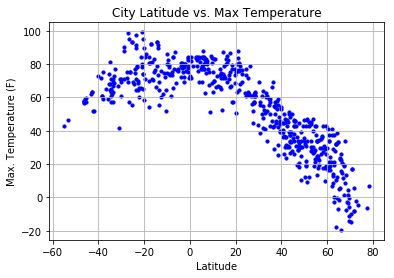

In [6]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], marker="o", s=10, color='b')

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_plots/latitude_vs_temperature_plot.png")

plt.show()

#### Latitude vs. Humidity Plot

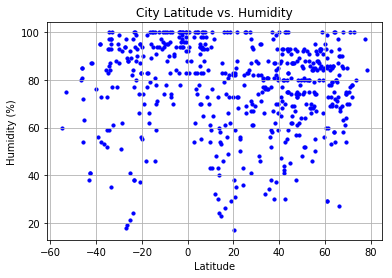

In [7]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], marker="o", s=10, color='b')

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_plots/latitude_vs_humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

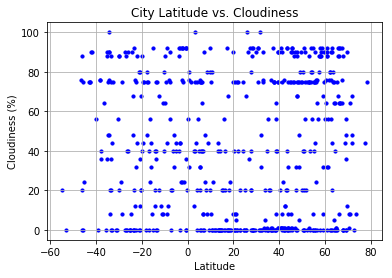

In [8]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], marker="o", s=10, color='b')

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_plots/latitude_vs_cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

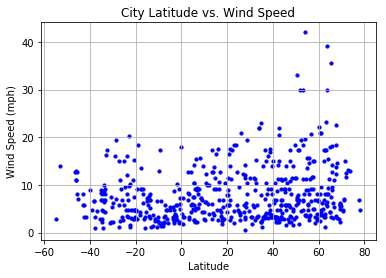

In [9]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], marker="o", s=10, color='b')

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_plots/latitude_vs_wind_speed.png")

plt.show()